In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("houses_Madrid.csv")

df.head(10)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True
5,5,21737,Piso en venta en geologia,"San Andrés, Madrid",126.0,114.0,4,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,False,False,False,True
6,6,21736,Piso en venta en avenida Real de Pinto,"San Andrés, Madrid",120.0,100.0,5,2.0,NaN,NaN,...,F,True,NaN,NaN,True,0.0,False,False,True,False
7,7,21735,Piso en venta en San Andrés,"Villaverde, Madrid",125.0,100.0,3,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,False,False,True,False
8,8,21734,Piso en venta en Butarque,"Villaverde, Madrid",84.0,70.0,3,2.0,NaN,NaN,...,F,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
9,9,21733,Piso en venta en calle de Martinez Oviol,"Los Rosales, Madrid",85.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,True,False,False


In [13]:

df.shape

(21742, 58)

In [14]:
df.size

1261036

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21742.0,10870.500000,6276.519112,0.0,5435.25,10870.5,16305.75,21741.0
id,21742.0,10871.500000,6276.519112,1.0,5436.25,10871.5,16306.75,21742.0
sq_mt_built,21616.0,146.920892,134.181865,13.0,70.00,100.0,162.00,999.0
sq_mt_useful,8228.0,103.458192,88.259192,1.0,59.00,79.0,113.00,998.0
n_rooms,21742.0,3.005749,1.510497,0.0,2.00,3.0,4.00,24.0
n_bathrooms,21726.0,2.091687,1.406992,1.0,1.00,2.0,2.00,16.0
n_floors,1437.0,3.128740,0.907713,1.0,2.00,3.0,4.00,7.0
sq_mt_allotment,1432.0,241.692737,247.484853,1.0,2.00,232.0,354.00,997.0
latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.isnull().sum()

Unnamed: 0                          0
id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by

In [18]:
df["rent_price_by_area"].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 21742 entries, 0 to 21741
Series name: rent_price_by_area
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 170.0 KB


In [ ]:
df=df.drop(columns=["sq_mt_useful","n_floors","sq_mt_allotment","latitude","longitude","raw_address","street_number","portal","door","rent_price_by_area","is_orientation_north","is_orientation_west","is_orientation_south","is_orientation_east","are_pets_allowed","is_furnished","is_kitchen_equipped","has_public_parking","has_private_parking","parking_price"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   is_exact_address_hidden       21742 non-null  bool   
 8   street_name                   15837 non-null  object 
 9   floor                         19135 non-null  object 
 10  is_floor_under                20572 non-null  object 
 11  neighborhood_id               21742 non-null  object 
 12  operation                     21742 non-null  object 
 13  r

In [22]:
df["is_rent_price_known"]

0        False
1        False
2        False
3        False
4        False
         ...  
21737    False
21738    False
21739    False
21740    False
21741    False
Name: is_rent_price_known, Length: 21742, dtype: bool

In [23]:
df[df["is_rent_price_known"]!=False]


,Unnamed: 0,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,street_name,floor,...,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price


In [24]:
df.drop(["is_rent_price_known"],axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   is_exact_address_hidden       21742 non-null  bool   
 8   street_name                   15837 non-null  object 
 9   floor                         19135 non-null  object 
 10  is_floor_under                20572 non-null  object 
 11  neighborhood_id               21742 non-null  object 
 12  operation                     21742 non-null  object 
 13  r

In [26]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
id,21742,21741,21740,21739,21738,21737,21736,21735,21734,21733
title,"Piso en venta en calle de Godella, 64",Piso en venta en calle de la del Manojo de Rosas,"Piso en venta en calle del Talco, 68",Piso en venta en calle Pedro Jiménez,Piso en venta en carretera de Villaverde a Val...,Piso en venta en geologia,Piso en venta en avenida Real de Pinto,Piso en venta en San Andrés,Piso en venta en Butarque,Piso en venta en calle de Martinez Oviol
subtitle,"San Cristóbal, Madrid","Los Ángeles, Madrid","San Andrés, Madrid","San Andrés, Madrid","Los Rosales, Madrid","San Andrés, Madrid","San Andrés, Madrid","Villaverde, Madrid","Villaverde, Madrid","Los Rosales, Madrid"
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0
n_rooms,2,3,2,2,2,4,5,3,3,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
is_exact_address_hidden,False,True,False,True,True,True,True,True,True,True
street_name,Calle de Godella,Calle de la del Manojo de Rosas,Calle del Talco,Calle Pedro Jiménez,Carretera de Villaverde a Vallecas,geologia,Avenida Real de Pinto,NaN,NaN,Calle de Martinez Oviol
floor,3,4,1,Bajo,4,3,1,2,NaN,7


In [ ]:
df.head(10).Tdf.head(10).T

In [28]:
df=df.loc[df["rent_price"]>0]

In [29]:
df=df.loc[df["buy_price"]>0]
df.T

,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
id,21742,21741,21740,21739,21738,21737,21736,21735,21734,21733,...,10,9,8,7,6,5,4,3,2,1
title,"Piso en venta en calle de Godella, 64",Piso en venta en calle de la del Manojo de Rosas,"Piso en venta en calle del Talco, 68",Piso en venta en calle Pedro Jiménez,Piso en venta en carretera de Villaverde a Val...,Piso en venta en geologia,Piso en venta en avenida Real de Pinto,Piso en venta en San Andrés,Piso en venta en Butarque,Piso en venta en calle de Martinez Oviol,...,Piso en venta en calle Júpiter,Casa o chalet independiente en venta en aveni...,Piso en venta en calle Galeón,Piso en venta en calle Bahía de Almería,Piso en venta en calle Bahía de Alicante,Ático en venta en Casco Histórico de Barajas,Piso en venta en Urb. Campo de las Naciones - ...,Piso en venta en Campo de las Naciones-Corralejos,"Chalet adosado en venta en calle Burriana, 12","Piso en venta en calle San Epifanio, 9"
subtitle,"San Cristóbal, Madrid","Los Ángeles, Madrid","San Andrés, Madrid","San Andrés, Madrid","Los Rosales, Madrid","San Andrés, Madrid","San Andrés, Madrid","Villaverde, Madrid","Villaverde, Madrid","Los Rosales, Madrid",...,"Casco Histórico de Barajas, Madrid","Campo de las Naciones-Corralejos, Madrid","Alameda de Osuna, Madrid","Campo de las Naciones-Corralejos, Madrid","Campo de las Naciones-Corralejos, Madrid","Barajas, Madrid","Barajas, Madrid","Barajas, Madrid","Campo de las Naciones-Corralejos, Madrid","Imperial, Madrid"
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0,...,74.0,267.0,89.0,88.0,99.0,78.0,96.0,175.0,289.0,72.0
n_rooms,2,3,2,2,2,4,5,3,3,2,...,2,5,3,2,2,2,2,4,4,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
is_exact_address_hidden,False,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
street_name,Calle de Godella,Calle de la del Manojo de Rosas,Calle del Talco,Calle Pedro Jiménez,Carretera de Villaverde a Vallecas,geologia,Avenida Real de Pinto,NaN,NaN,Calle de Martinez Oviol,...,Calle Júpiter,Avenida de Logroño,Calle Galeón,Calle Bahía de Almería,Calle Bahía de Alicante,NaN,Urb. Campo de las Naciones - Corralejos,NaN,Calle Burriana,Calle San Epifanio
floor,3,4,1,Bajo,4,3,1,2,NaN,7,...,Entreplanta exterior,NaN,5,1,1,4,3,Bajo,NaN,NaN


In [30]:
df=df.drop(columns=["title","subtitle","is_exact_address_hidden","neighborhood_id","has_individual_heating"])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19095 non-null  int64  
 1   id                            19095 non-null  int64  
 2   sq_mt_built                   19095 non-null  float64
 3   n_rooms                       19095 non-null  int64  
 4   n_bathrooms                   19081 non-null  float64
 5   street_name                   14670 non-null  object 
 6   floor                         17596 non-null  object 
 7   is_floor_under                18265 non-null  object 
 8   operation                     19095 non-null  object 
 9   rent_price                    19095 non-null  int64  
 10  buy_price                     19095 non-null  int64  
 11  buy_price_by_area             19095 non-null  int64  
 12  is_buy_price_known            19095 non-null  bool   
 13  house_

In [32]:
df[['has_ac', 'has_fitted_wardrobes', 'has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_parking_included_in_price','has_central_heating']] = df[['has_ac', 'has_fitted_wardrobes', 'has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_parking_included_in_price','has_central_heating']].fillna(False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19095 non-null  int64  
 1   id                            19095 non-null  int64  
 2   sq_mt_built                   19095 non-null  float64
 3   n_rooms                       19095 non-null  int64  
 4   n_bathrooms                   19081 non-null  float64
 5   street_name                   14670 non-null  object 
 6   floor                         17596 non-null  object 
 7   is_floor_under                18265 non-null  object 
 8   operation                     19095 non-null  object 
 9   rent_price                    19095 non-null  int64  
 10  buy_price                     19095 non-null  int64  
 11  buy_price_by_area             19095 non-null  int64  
 12  is_buy_price_known            19095 non-null  bool   
 13  house_

In [33]:
encoder = LabelEncoder()
for column in ['energy_certificate', 'house_type_id','operation','street_name']:
    df[column] = encoder.fit_transform(df[column])


In [34]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
id,21742,21741,21740,21739,21738,21737,21736,21735,21734,21733,...,10,9,8,7,6,5,4,3,2,1
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0,...,74.0,267.0,89.0,88.0,99.0,78.0,96.0,175.0,289.0,72.0
n_rooms,2,3,2,2,2,4,5,3,3,2,...,2,5,3,2,2,2,2,4,4,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
street_name,2987,3715,4075,1989,4273,5660,209,5812,5812,3165,...,1614,261,1339,737,736,5812,5363,5812,811,2259
floor,3,4,1,Bajo,4,3,1,2,NaN,7,...,Entreplanta exterior,NaN,5,1,1,4,3,Bajo,NaN,NaN
is_floor_under,False,False,False,True,False,False,False,False,NaN,False,...,True,False,False,False,False,False,False,True,False,NaN
operation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rent_price,471,666,722,583,1094,901,884,912,954,672,...,1037,2315,1135,1346,1320,1323,1496,2081,2115,1494


In [35]:
df=df.drop(columns=["Unnamed: 0","id","is_floor_under","operation","buy_price_by_area","is_buy_price_known","house_type_id","has_central_heating","is_exterior","is_accessible","floor"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   19095 non-null  float64
 1   n_rooms                       19095 non-null  int64  
 2   n_bathrooms                   19081 non-null  float64
 3   street_name                   19095 non-null  int32  
 4   rent_price                    19095 non-null  int64  
 5   buy_price                     19095 non-null  int64  
 6   is_renewal_needed             19095 non-null  bool   
 7   is_new_development            18176 non-null  object 
 8   built_year                    8753 non-null   float64
 9   has_ac                        19095 non-null  bool   
 10  has_fitted_wardrobes          19095 non-null  bool   
 11  has_lift                      17788 non-null  object 
 12  has_garden                    19095 non-null  bool   
 13  has_po

In [ ]:
df["is_rent_price_known"]

In [37]:
df[df["is_rent_price_known"]!=False]


KeyError: 'is_rent_price_known'

In [38]:
df.drop(["is_rent_price_known"],axis=1, inplace=True)

KeyError: "['is_rent_price_known'] not found in axis"

In [39]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   19095 non-null  float64
 1   n_rooms                       19095 non-null  int64  
 2   n_bathrooms                   19081 non-null  float64
 3   street_name                   19095 non-null  int32  
 4   rent_price                    19095 non-null  int64  
 5   buy_price                     19095 non-null  int64  
 6   is_renewal_needed             19095 non-null  bool   
 7   is_new_development            18176 non-null  object 
 8   built_year                    8753 non-null   float64
 9   has_ac                        19095 non-null  bool   
 10  has_fitted_wardrobes          19095 non-null  bool   
 11  has_lift                      17788 non-null  object 
 12  has_garden                    19095 non-null  bool   
 13  has_po

In [40]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0
n_rooms,2,3,2,2,2,4,5,3,3,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
street_name,2987,3715,4075,1989,4273,5660,209,5812,5812,3165
rent_price,471,666,722,583,1094,901,884,912,954,672
buy_price,85000,129900,144247,109900,260000,195000,190000,198500,212000,131400
is_renewal_needed,False,True,False,False,False,False,False,False,False,True
is_new_development,False,False,False,False,False,False,False,False,False,False
built_year,1960.0,NaN,NaN,1955.0,2003.0,1981.0,NaN,NaN,NaN,1950.0
has_ac,True,False,False,False,True,False,True,True,True,False


In [41]:
df[df["rent_price"]<0].

SyntaxError: invalid syntax (3171018227.py, line 1)

In [42]:
df=df.loc[df["rent_price"]>0]


In [43]:
df=df.loc[df["buy_price"]>0]

In [44]:
df.T


,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0,...,74.0,267.0,89.0,88.0,99.0,78.0,96.0,175.0,289.0,72.0
n_rooms,2,3,2,2,2,4,5,3,3,2,...,2,5,3,2,2,2,2,4,4,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
street_name,2987,3715,4075,1989,4273,5660,209,5812,5812,3165,...,1614,261,1339,737,736,5812,5363,5812,811,2259
rent_price,471,666,722,583,1094,901,884,912,954,672,...,1037,2315,1135,1346,1320,1323,1496,2081,2115,1494
buy_price,85000,129900,144247,109900,260000,195000,190000,198500,212000,131400,...,239500,790000,275000,360000,349000,350000,425000,680000,695000,424000
is_renewal_needed,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
is_new_development,False,False,False,False,False,False,False,False,False,False,...,False,NaN,NaN,False,False,False,False,False,False,True
built_year,1960.0,NaN,NaN,1955.0,2003.0,1981.0,NaN,NaN,NaN,1950.0,...,1988.0,2020.0,NaN,NaN,NaN,2020.0,2002.0,2002.0,1981.0,NaN
has_ac,True,False,False,False,True,False,True,True,True,False,...,False,True,False,False,True,True,True,True,True,False


In [45]:
df=df.drop(columns=["title","subtitle","is_exact_address_hidden","neighborhood_id","has_individual_heating"])


KeyError: "['title', 'subtitle', 'is_exact_address_hidden', 'neighborhood_id', 'has_individual_heating'] not found in axis"

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   19095 non-null  float64
 1   n_rooms                       19095 non-null  int64  
 2   n_bathrooms                   19081 non-null  float64
 3   street_name                   19095 non-null  int32  
 4   rent_price                    19095 non-null  int64  
 5   buy_price                     19095 non-null  int64  
 6   is_renewal_needed             19095 non-null  bool   
 7   is_new_development            18176 non-null  object 
 8   built_year                    8753 non-null   float64
 9   has_ac                        19095 non-null  bool   
 10  has_fitted_wardrobes          19095 non-null  bool   
 11  has_lift                      17788 non-null  object 
 12  has_garden                    19095 non-null  bool   
 13  has_po

In [47]:
df[['has_ac', 'has_fitted_wardrobes', 'has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_parking_included_in_price','has_central_heating']] = df[['has_ac', 'has_fitted_wardrobes', 'has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones','is_parking_included_in_price','has_central_heating']].fillna(False)
df.info()

KeyError: "['is_accessible', 'has_central_heating'] not in index"

In [48]:
for column in ['energy_certificate', 'house_type_id','operation','street_name']:
    df[column] = encoder.fit_transform(df[column])



KeyError: 'house_type_id'

In [49]:
encoder = LabelEncoder()

In [50]:

df.T

,0,1,2,3,4,5,6,7,8,9,...,21732,21733,21734,21735,21736,21737,21738,21739,21740,21741
sq_mt_built,64.0,70.0,94.0,64.0,108.0,126.0,120.0,125.0,84.0,85.0,...,74.0,267.0,89.0,88.0,99.0,78.0,96.0,175.0,289.0,72.0
n_rooms,2,3,2,2,2,4,5,3,3,2,...,2,5,3,2,2,2,2,4,4,2
n_bathrooms,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
street_name,2987,3715,4075,1989,4273,5660,209,5812,5812,3165,...,1614,261,1339,737,736,5812,5363,5812,811,2259
rent_price,471,666,722,583,1094,901,884,912,954,672,...,1037,2315,1135,1346,1320,1323,1496,2081,2115,1494
buy_price,85000,129900,144247,109900,260000,195000,190000,198500,212000,131400,...,239500,790000,275000,360000,349000,350000,425000,680000,695000,424000
is_renewal_needed,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
is_new_development,False,False,False,False,False,False,False,False,False,False,...,False,NaN,NaN,False,False,False,False,False,False,True
built_year,1960.0,NaN,NaN,1955.0,2003.0,1981.0,NaN,NaN,NaN,1950.0,...,1988.0,2020.0,NaN,NaN,NaN,2020.0,2002.0,2002.0,1981.0,NaN
has_ac,True,False,False,False,True,False,True,True,True,False,...,False,True,False,False,True,True,True,True,True,False


In [51]:
df=df.drop(columns=["Unnamed: 0","id","is_floor_under","operation","buy_price_by_area","is_buy_price_known","house_type_id","has_central_heating","is_exterior","is_accessible","floor"])


KeyError: "['Unnamed: 0', 'id', 'is_floor_under', 'operation', 'buy_price_by_area', 'is_buy_price_known', 'house_type_id', 'has_central_heating', 'is_exterior', 'is_accessible', 'floor'] not found in axis"

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19095 entries, 0 to 21741
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   19095 non-null  float64
 1   n_rooms                       19095 non-null  int64  
 2   n_bathrooms                   19081 non-null  float64
 3   street_name                   19095 non-null  int32  
 4   rent_price                    19095 non-null  int64  
 5   buy_price                     19095 non-null  int64  
 6   is_renewal_needed             19095 non-null  bool   
 7   is_new_development            18176 non-null  object 
 8   built_year                    8753 non-null   float64
 9   has_ac                        19095 non-null  bool   
 10  has_fitted_wardrobes          19095 non-null  bool   
 11  has_lift                      17788 non-null  object 
 12  has_garden                    19095 non-null  bool   
 13  has_po

In [53]:
df['built_year'] = df['built_year'].fillna(1960)


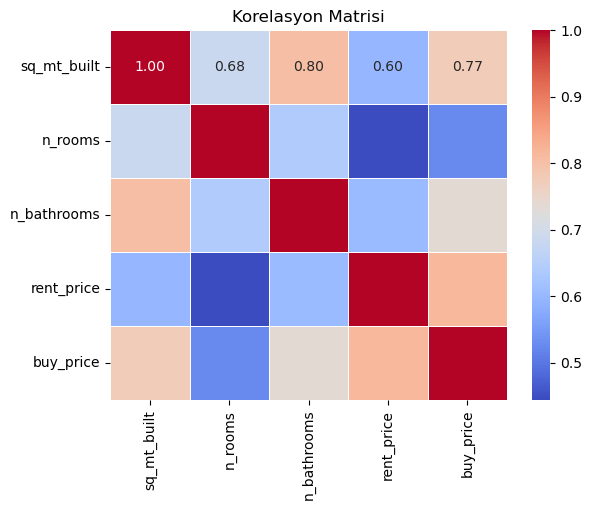

In [54]:
#korelasyon matrisine bakalım
columns_of_interest = ['sq_mt_built', 'n_rooms','n_bathrooms','rent_price','buy_price']
# Seçilen sütunlar için korelasyon matrisini hesaplama
corr_matrix = df[columns_of_interest].corr()
# Korelasyon matrisini görselleştirme
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [55]:
df = df.dropna()

In [56]:
X = df.drop('buy_price', axis=1)  # Özellikler (bağımsız değişkenler)
y = df['buy_price']  # Etiket (bağımlı değişken)



In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'train_test_split' is not defined

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Modeli eğitim verisi ile eğitin
model.fit(X_train, y_train)



NameError: name 'model' is not defined

In [60]:

# Modeli oluşturun
model = SVC()

NameError: name 'SVC' is not defined

In [61]:
from sklearn.svm import SVC

In [62]:
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [66]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined